In [38]:
import torch 
import numpy as np 
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt

In [39]:
n = 100

h = n//2

dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[-2.31922674e+00, -1.25032806e+00],
       [ 1.00991751e+00, -2.91006306e+00],
       [ 5.45999325e+00,  5.53994593e+00],
       [-3.24627273e-01,  1.74729330e+00],
       [-1.19523548e+00, -5.38698035e+00],
       [ 6.55932430e+00,  6.09893032e+00],
       [ 7.54083896e-01,  1.48348658e-02],
       [ 5.46309906e+00, -1.12630745e+00],
       [ 4.72392321e-01,  2.68502681e+00],
       [-4.10829374e+00, -9.41328951e-01],
       [ 1.65857888e+00,  3.86590378e+00],
       [ 2.47071934e+00,  4.60496988e+00],
       [ 1.69587594e+00, -5.87634025e+00],
       [-1.83522822e-01,  3.91991181e+00],
       [-4.86766126e+00,  1.94694948e+00],
       [-3.27514592e+00,  2.09262548e+00],
       [-5.36604217e+00, -1.48898171e+00],
       [ 2.21636910e+00, -5.31846940e-02],
       [-1.02338672e+00,  6.70910322e+00],
       [ 9.36276924e-01,  1.71796977e-01],
       [-5.26218464e-03, -4.18364365e+00],
       [-1.06386605e-01, -1.57689879e+00],
       [ 1.69914498e+00,  5.40553400e+00],
       [-5.

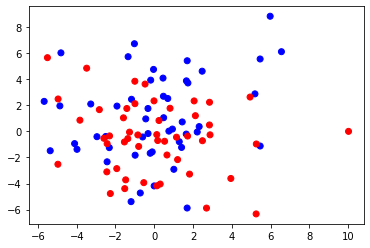

In [40]:
colors = ['blue', 'red']

color = np.array( [colors[0]]*h + [colors[1]]*h ).reshape(n)

#plt.scatter(data[:,0], data[:,1])

plt.scatter(data[:,0], data[:,1], c = color)

In [41]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))

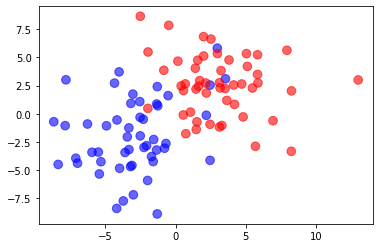

In [42]:
colors = ['blue', 'red']

color = np.array( [colors[0]]*h + [colors[1]]*h ).reshape(n)

plt.scatter(data[:,0], data[:,1], c = color, s=75, alpha = 0.6 )

In [ ]:
target = np.array( [0]*h + [1]*h ).reshape(n,1)
target

In [44]:
x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2531, grad_fn=<BinaryCrossEntropyBackward>)

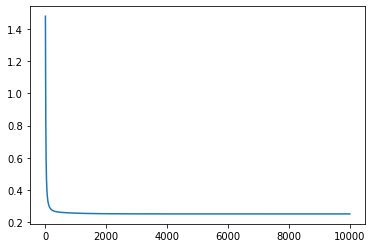

In [47]:
model =  nn.Sequential(
        nn.Linear(2 , 1),
        nn.Sigmoid()
        )

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

losses = []

iterations = 10000

for i in range(iterations): 

  result = model(x)

  loss = loss_function(result, y )

  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations),losses)

loss

In [51]:
#prueba

blue = torch.Tensor([[-5,-6]])

prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

blue


In [52]:
red = torch.Tensor([[8,6]])

prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

blue


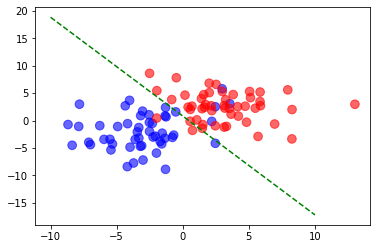

In [58]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')